<a href="https://colab.research.google.com/github/ubsuny/CompPhys/blob/Colab/DataAnalysis/FFT/CP1_23_CO2notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
plt.rcParams['font.size'] = 14

In [ ]:
df = pd.read_csv(
    'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mlo_surface-flask_1_ccgg_month.txt',
    delimiter="\s+",skiprows=54, names=['site',	'year',	'month',	'value'])

In [ ]:
df

,site,year,month,value
0,MLO,1969,8,322.51
1,MLO,1969,9,321.36
2,MLO,1969,10,320.74
3,MLO,1969,11,321.98
4,MLO,1969,12,323.77
...,...,...,...,...
570,MLO,2022,8,416.92
571,MLO,2022,9,415.57
572,MLO,2022,10,415.56
573,MLO,2022,11,417.46


In [ ]:
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')

In [ ]:
df['date'].dtype

period[M]

In [ ]:
df = df.set_index(df['date'])

In [ ]:
df

,site,year,month,value,date
date,,,,,
1969-08,MLO,1969,8,322.51,1969-08
1969-09,MLO,1969,9,321.36,1969-09
1969-10,MLO,1969,10,320.74,1969-10
1969-11,MLO,1969,11,321.98,1969-11
1969-12,MLO,1969,12,323.77,1969-12
...,...,...,...,...,...
2022-08,MLO,2022,8,416.92,2022-08
2022-09,MLO,2022,9,415.57,2022-09
2022-10,MLO,2022,10,415.56,2022-10


<Axes: xlabel='date'>

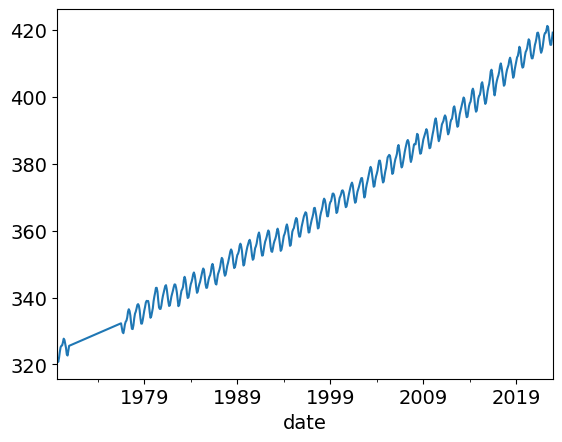

In [ ]:
df['value'].plot()

In [ ]:
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
                     [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )

In [28]:
df['months'] = [m.n for m in (df.index-df.index[0])]

In [29]:
df

,site,year,month,value,date,months
date,,,,,,
1969-08,MLO,1969,8,322.51,1969-08,0
1969-09,MLO,1969,9,321.36,1969-09,1
1969-10,MLO,1969,10,320.74,1969-10,2
1969-11,MLO,1969,11,321.98,1969-11,3
1969-12,MLO,1969,12,323.77,1969-12,4
...,...,...,...,...,...,...
2022-08,MLO,2022,8,416.92,2022-08,636
2022-09,MLO,2022,9,415.57,2022-09,637
2022-10,MLO,2022,10,415.56,2022-10,638


In [ ]:
Y = fft(df['value'][-512:])

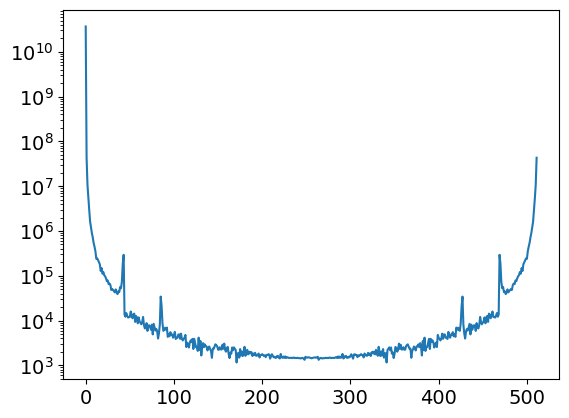

In [ ]:
plt.plot(np.abs(Y)**2)
plt.yscale("log")